# TITANIC SURVIVAL PREDICTION

Dataset - 'https://www.kaggle.com/datasets/yasserh/titanic-dataset'

In [1]:
import numpy as np   # For numerical computations and working with arrays.
import pandas as pd  # For handling and processing tabular data.
import matplotlib.pyplot as plt  # For creating static visualizations.
import seaborn as sns  # For creating visually appealing and informative plots.


from sklearn.linear_model import LogisticRegression  # Logistic Regression model for classification tasks.
from sklearn.model_selection import train_test_split  # To split data into training and testing sets.
from sklearn.linear_model import LogisticRegression  # Redundant import, can be removed.
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score  

# Metrics to evaluate model performance:
# - accuracy_score: Measures the ratio of correct predictions.
# - confusion_matrix: Summarizes the performance of a classification model.
# - precision_score: Measures the precision of positive predictions.

In [2]:
# Load the Titanic dataset from the specified CSV file into a Pandas DataFrame.
df = pd.read_csv('data/Titanic-Dataset.csv')

# Display the first 5 rows of the DataFrame to get a quick overview of the dataset.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Cleaning Data
Handle Missing Values
Fix Structural Errors
Remove Duplicates

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Checking for Null Values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#let's the missing value of age fill with the median of others values
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#drop the Cabin columns Because its missing values is too much
df.drop(columns=['Cabin'],axis=1,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [9]:
#let drop the Embarked missing values
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#checking for duplicate values
df.duplicated().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Data Transformation
* Convert categorical variables into numerical
* Normalization/Scaling

In [11]:
# Import the LabelEncoder from sklearn to encode categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Apply the label encoder to the 'Sex' column, converting the categories 'male' and 'female' into 0 and 1.
df['Sex'] = encoder.fit_transform(df['Sex'])
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [12]:
encoder = LabelEncoder()

# Apply the label encoder to the 'Embarked' column, converting the categories 'C', 'Q', and 'S' into 0, 1, and 2 respectively.
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [13]:
## Dropping the columns Ticket and Name from data frame

df = df.drop(columns=['Ticket'])
df = df.drop(columns=['Name'])

## Exploratory Data Analysis(EDA)

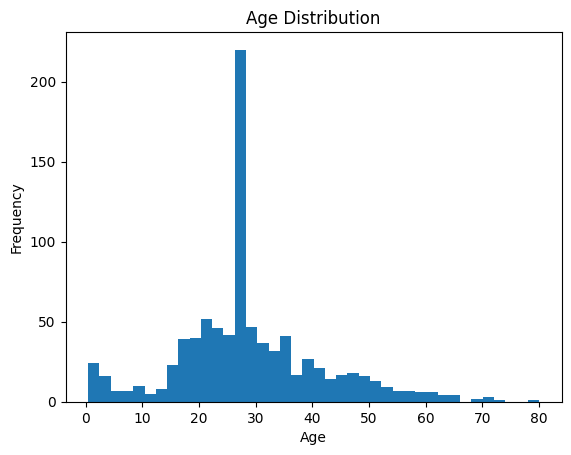

In [14]:
#Age of passengers in Titanic
df['Age'].plot(kind='hist', bins=40)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

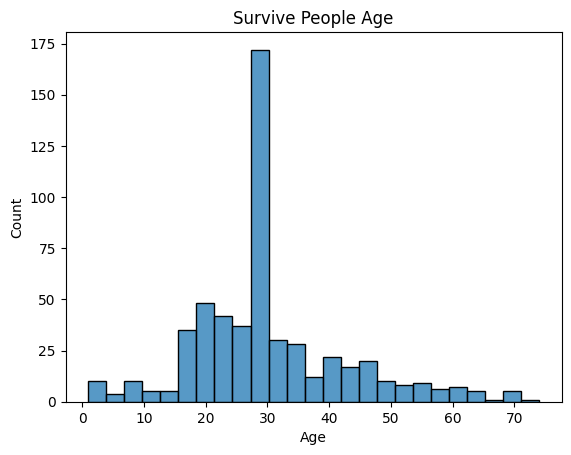

In [15]:
# Assuming 'df' is your DataFrame
df['Sex'] = df['Sex'].astype('category')
sns.histplot(df[df['Survived']==0]['Age'])
plt.title('Survive People Age')
plt.xlabel('Age')
plt.show()


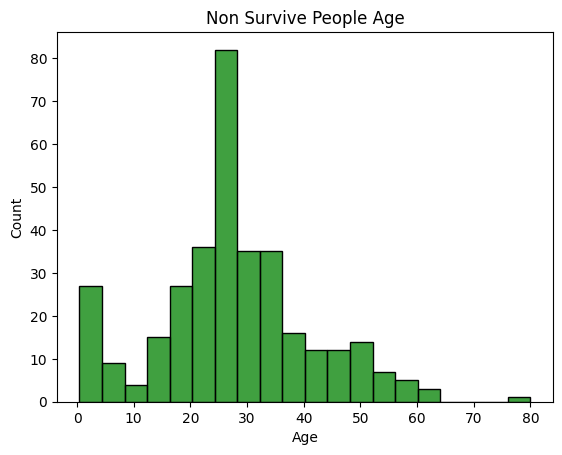

In [16]:
sns.histplot(df[df['Survived']==1]['Age'],color='green')
plt.title('Non Survive People Age')
plt.xlabel('Age')
plt.show()

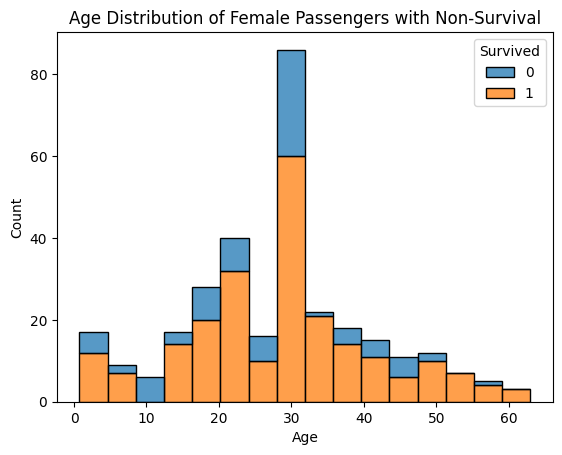

In [17]:
female_pas = df[df['Sex'] == 0]
sns.histplot(data=female_pas,x='Age',hue='Survived',multiple='stack')
plt.title('Age Distribution of Female Passengers with Non-Survival')
plt.xlabel('Age')
plt.show()

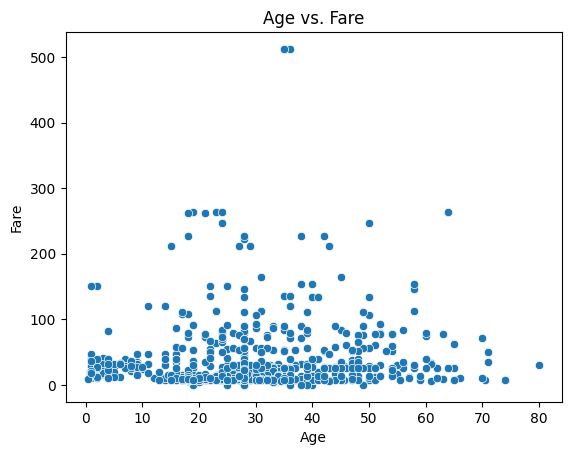

In [18]:
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

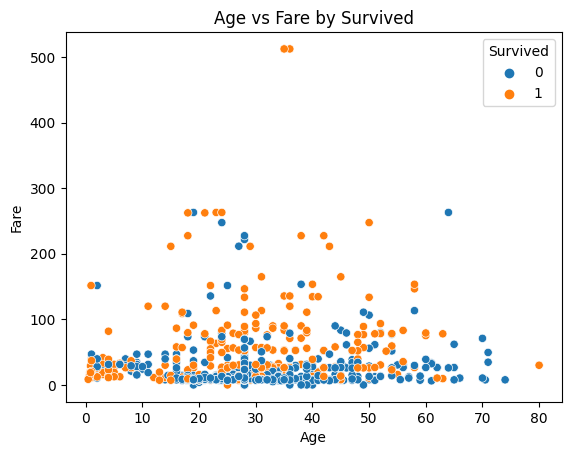

In [19]:
sns.scatterplot(x='Age',y='Fare', hue='Survived', data=df)
plt.title('Age vs Fare by Survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_28004\305591221.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005028 -0.035330  0.031319 -0.057686 -0.001657   
Survived       -0.005028  1.000000 -0.335549 -0.069822 -0.034040  0.083151   
Pclass         -0.035330 -0.335549  1.000000 -0.336512  0.081656  0.016824   
Age             0.031319 -0.069822 -0.336512  1.000000 -0.232543 -0.171485   
SibSp          -0.057686 -0.034040  0.081656 -0.232543  1.000000  0.414542   
Parch          -0.001657  0.083151  0.016824 -0.171485  0.414542  1.000000   
Fare            0.012703  0.255290 -0.548193  0.093707  0.160887  0.217532   
Embarked        0.013166 -0.169718  0.164681 -0.020933  0.068900  0.040449   

                 Fare  Embarked  
PassengerId  0.012703  0.013166  
Survived     0.255290 -0.169718  
Pclass      -0.548193  0.164681  
Age          0.093707 -0.020933  
SibSp        0.160887  0.068900  
Parch        0.217532  0.040449  
Fare         1.000000 -0.226311  
Embarked    -0.226311  1.

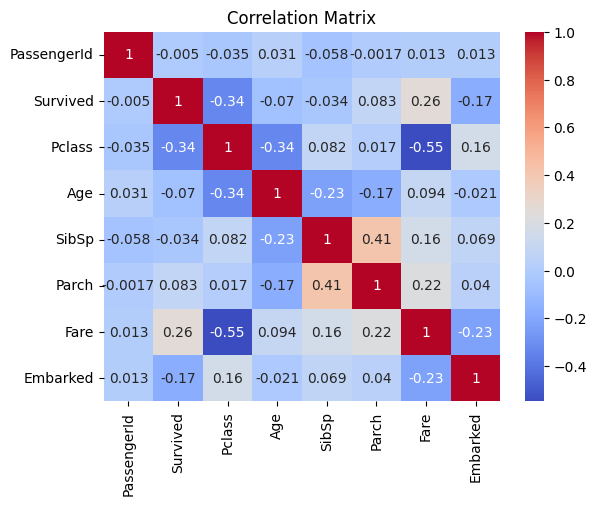

In [20]:
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')
plt.show()

Pclass      1   2    3
Survived              
0          80  97  372
1         134  87  119


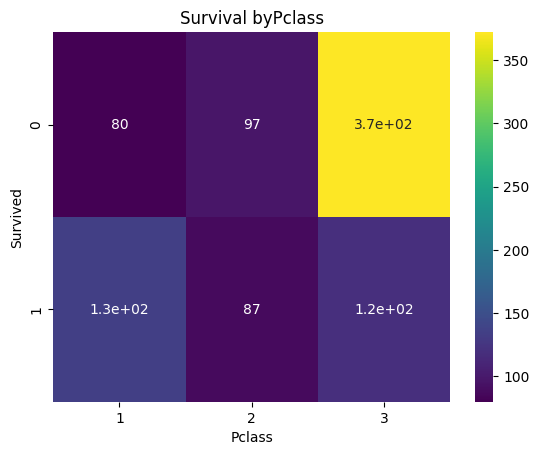

In [21]:
cross_tab = pd.crosstab(df['Survived'], df['Pclass'])

print(cross_tab)
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Survival byPclass')
plt.show()

Sex        0           1         
Pclass     1   2   3   1   2    3
Survived                         
0          3   6  72  77  91  300
1         89  70  72  45  17   47


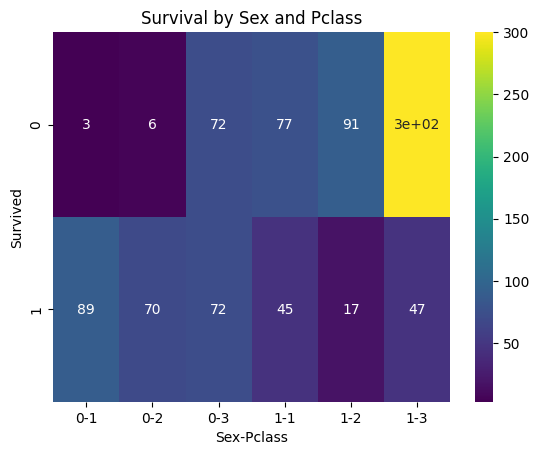

In [22]:
cross_tab = pd.crosstab(df['Survived'], [df['Sex'], df['Pclass']])
print(cross_tab)
sns.heatmap(cross_tab, annot=True, cmap='viridis')
plt.title('Survival by Sex and Pclass')
plt.show()

## Model Training

**Splitting data into training and test set**

In [23]:
from sklearn.model_selection import train_test_split
# Define features (independent variables) and target variable (dependent variable)
X = df.drop('Survived', axis=1)  # All columns except 'Survived'
y = df['Survived']

# Split data into training and testing sets with a test size of 20% (adjustable)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(711, 8) (178, 8) (711,) (178,)


**Defining model**

In [24]:
model = LogisticRegression(max_iter=1000)

**Fitting the training data to the model**

In [25]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

**Predicting label on test dataset**

In [27]:
y_pred = model.predict(X_test)

**Evaluating model**

In [29]:
model_acc = f"{accuracy_score(Y_test, y_pred) * 100:.2f}%"
print("Accuracy:",model_acc)
model_pscore = f"{precision_score(Y_test,y_pred)* 100:.2f}%"
print("P_Score:",model_pscore)

Accuracy: 77.53%
P_Score: 68.83%


**Confusion Matrix**

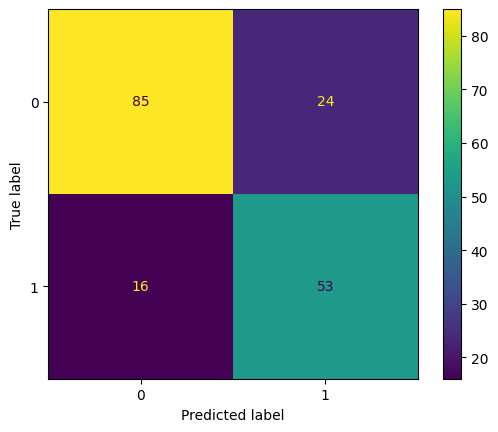

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(Y_test,y_pred)